In [10]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import random as rnd
import os
import math

# required for interactive plotting
from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
import numpy.polynomial as np_poly

from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML

from pprint import pprint
import functools as ft

initialization  
$
\newcommand{\E}[1]{\mathbb{E}\left[ #1 \right]}
\newcommand{\V}[1]{\mathbb{V}\left[#1\right]}
\newcommand{\cov}[1]{\text{cov} \sigma\left[#1\right]}
\newcommand{\expb}[1]{\exp\left\{#1\right\}} 
\newcommand{\LN}[1]{\ln\left\{#1\right\}} 
\newcommand{\P}{\mathbb{P}}
\newcommand{\underl}[1]{\text{$\underline{#1}$}}
\newcommand{\fracone}[1]{\frac{1}{#1}}
\newcommand{\half}{\fracone{2}}
\newcommand{\Lim}[1]{\displaystyle \lim_{#1}}
\newcommand{\Norm}[1]{\left\lVert #1 \right\rVert}
\newcommand{\inv}[1]{#1^{-1}}
\newcommand{\invp}[1]{\left({#1}\right)^{-1}}
\DeclareMathOperator*{\argmin}{arg\,min}
\DeclareMathOperator*{\argmax}{arg\,max}
$

$
\newcommand{\mat}[1]{ \left[ \begin{matrix} #1 \end{matrix} \right] }
\newcommand{\matp}[1]{ \left( \begin{matrix} #1 \end{matrix} \right)}
\newcommand{\mats}[1]{ \begin{matrix}#1\end{matrix} }
$

$\newcommand{\arrthree}[1]{
\begin{array}{rlr} #1 \end{array}}
$

$
\newcommand{\D}{\mathcal{D}}
\newcommand{\G}{\mathcal{G}}
\newcommand{\I}{\mathcal{I}}
\newcommand{\N}{\mathbb{N}}
\newcommand{\R}{\mathbb{R}}
$

$
\newcommand{\commentgray}[1]{\color{gray}{\text{#1}}}
$



sum, product
$
\newcommand{\sumiN}{\displaystyle \sum_{i=1}^{N}}
\newcommand{\sumjD}{\displaystyle \sum_{j=1}^{D}}
\newcommand{\sumjK}{\displaystyle \sum_{j=1}^{K}}
\newcommand{\sumjMl}{\sum_{j=1}^{M-1}}
\newcommand{\sumkK}{\displaystyle \sum_{k=1}^{K}}
\newcommand{\sumkM}{\displaystyle \sum_{k=1}^{M}}
\newcommand{\sumkMl}{\sum_{k=1}^{M-1}}
\newcommand{\summN}{\displaystyle \sum_{m=1}^{N}}
\newcommand{\sumnN}{\displaystyle \sum_{n=1}^{N}}
$
$
\newcommand{\prodiN}{\displaystyle \prod_{i=1}^{N}}
\newcommand{\prodjK}{\displaystyle \prod_{j=1}^{K}}
\newcommand{\prodkK}{\displaystyle \prod_{k=1}^{K}}
\newcommand{\prodmN}{\displaystyle \prod_{m=1}^{N}}
\newcommand{\prodnN}{\displaystyle \prod_{n=1}^{N}}
$

alphabet bold,
$
\newcommand{\ab}{\mathbf{a}}
\newcommand{\Ab}{\mathbf{A}}
\newcommand{\At}{\Ab^T}
\newcommand{\Abjk}{\Ab_{jk}}
\newcommand{\bb}{\mathbf{b}}
\newcommand{\Bb}{\mathbf{B}}
\newcommand{\Bt}{\Bb^T}
\newcommand{\Cb}{\mathbf{C}}
\newcommand{\Db}{\mathbf{D}}
\newcommand{\fb}{\mathbf{f}}
\newcommand{\fp}{f^{\prime}}
\newcommand{\Hb}{\mathbf{H}}
\newcommand{\kb}{\mathbf{k}}
\newcommand{\Kb}{\mathbf{K}}
\newcommand{\Lb}{\mathbf{L}}
\newcommand{\Lt}{\Lb^T}
\newcommand{\Lbi}{\Lb^{-1}}
\newcommand{\mb}{\mathbf{m}}
\newcommand{\Mb}{\mathbf{M}}
\newcommand{\Qb}{\mathbf{Q}}
\newcommand{\Rb}{\mathbf{R}}
\newcommand{\ub}{\mathbf{u}}
\newcommand{\Ub}{\mathbf{U}}
\newcommand{\vb}{\mathbf{v}}
\newcommand{\Vb}{\mathbf{V}}
\newcommand{\Xb}{\mathbf{X}}
\newcommand{\Xt}{\Xb^T}
\newcommand{\xb}{\mathbf{x}}
\newcommand{\xp}{x^{\prime}}
\newcommand{\xbp}{\xb^{\prime}}
\newcommand{\xbm}{\xb_m}
\newcommand{\xbn}{\xb_n}
\newcommand{\xab}{\mathbf{x_a}}
\newcommand{\xabt}{\mathbf{x_a}^T}
\newcommand{\xbb}{\mathbf{x_b}}
\newcommand{\xbbt}{\mathbf{x_b}^T}
\newcommand{\yb}{\mathbf{y}}
\newcommand{\yt}{\yb^T}
\newcommand{\zb}{\mathbf{z}}
\newcommand{\zbm}{\zb_m}
\newcommand{\zbn}{\zb_n}
\newcommand{\zbnp}{\zb_{n-1}}
\newcommand{\znk}{\zb_{nk}}
\newcommand{\znpj}{\zb_{n-1,j}}
\newcommand{\Zb}{\mathbf{Z}}
$

math bold
$
\newcommand{\chib}{\boldsymbol{\chi}}
\newcommand{\etab}{\pmb{\eta}}
\newcommand{\etat}{\eta^T}
\newcommand{\etabt}{\etab^T}
\newcommand{\laa}{\Lambda_{aa}}
\newcommand{\laai}{\Lambda_{aa}^{-1}}
\newcommand{\lab}{\Lambda_{ab}}
\newcommand{\lba}{\Lambda_{ba}}
\newcommand{\lbb}{\Lambda_{bb}}
\newcommand{\lbbi}{\Lambda_{bb}^{-1}}
\newcommand{\li}{\Lambda^{-1}}
\newcommand{\mub}{\pmb{\mu}}
\newcommand{\muab}{\pmb{\mu}_a}
\newcommand{\mubb}{\pmb{\mu}_b}
\newcommand{\pib}{\pmb{\pi}}
\newcommand{\saa}{\Sigma_{aa}}
\newcommand{\sab}{\Sigma_{ab}}
\newcommand{\sba}{\Sigma_{ba}}
\newcommand{\sbb}{\Sigma_{bb}}
\newcommand{\thetab}{\pmb{\theta}}
\newcommand{\thetat}{\thetab^T}
\newcommand{\thetabh}{\hat{\thetab}}
\newcommand{\thetaold}{\thetab^{\text{old}}}
$

$
\newcommand{\zerob}{\pmb{0}}
$


aliases for distributions
$\newcommand{\multivarcoeff}{\frac{1}{(2\pi)^{D/2}}
\frac{1}{\left| \mathbf{\Sigma}\right|^{1/2}}}$
$\newcommand{\multivarexp}[2]
{
\left\{
 -\frac{1}{2} 
 {#1}^T 
 #2
 {#1}
\right\}
}$
$\newcommand{\multivarexpx}[1]{\multivarexp{#1}{\Sigma^{-1}}}$
$\newcommand{\multivarexpstd}{\multivarexpx{(\xb-\mub)}}$
$\newcommand{\gam}{\operatorname{Gam}}$

$
\newcommand{\Nl}[3]{\mathcal{N}\left(#1 \middle | #2, #3\right)}
\newcommand{\Nstdx}{\Nl{\mathbf{x}}{\mathbf{\mu}}{\Sigma}}
$

Gaussian Basics
================

In a point cloud around origin within an unit circle, the mean is zero.

there is no correlation between the axes or dimensions and the covar becmes diagonal. this is saying that a particular value of x doesnt gimme any new information about y.

in

in a point cloud of an ellipse at 45 deg with elongation along 45 degee, the mean is still going to be zero.

but x and y are correlated now, so the covar is no longer diagonal.

that is to say, if i know a value of x, i gain some new information on the value of y

lets say we have a 2d gaussian. this will have the joint probability distribution in the z-axis. now, we take a slice of this, at a particular value of $x_1$, say $\chi_1$.  

Now the resulting distribution will be Gaussian as well.

The most important thing here is the conditioning

Multivariate Gaussian Theorem
==============================

Marginals and conditionals of an MVN  

Suppose $\xb = (\xb_1, \xb_2)$ is jointly Gaussian with parameters
$$
\mub = \matp{\mub_1 \\ \mub_2} \\
\Sigma =
\matp{\Sigma_{11} & \Sigma_{12} \\ \Sigma_{21} & \Sigma_{22}} \\
\Lambda = \Sigma^{-1} = 
\matp{\Lambda_{11} & \Lambda_{12} \\ \Lambda_{21} & \Lambda_{22}} \\
$$

The marginals are given by
$$
\arrthree{
p(\xb_1) &= \Nl{\xb_1}{\mub_1}{\Sigma_{11}} \\
p(\xb_2) &= \Nl{\xb_2}{\mub_2}{\Sigma_{22}}
}
$$

The posterior conditional is given by
$$
\arrthree{
p(\xb_1 \mid \xb_2) &=
\Nl{\xb_1}{\mub_{1 \mid 2}}{\Sigma_{1 \mid 2}}
\\
\mub_{1 \mid 2} &=
\mub_1 + \Sigma_{12} \Sigma_{22}^{-1} (\xb_2 - \mub_2)
\\
&=
\mub_1 - \Lambda_{11}^{-1} \Lambda_{12}(\xb_2 - \mub_2)
\\ &=
\Sigma_{1 \mid 2}
\left(
  \Lambda_{11} \mub_1
  - \Lambda_{12} (\xb_2 - \mub_2)
\right)
\\
\Sigma_{1 \mid 2} &=
\inv{\Lambda_{11}} =
\Sigma_{11}
- \Sigma_{12} \Sigma_{22}^{-1} \Sigma_{21}
}
$$

Gaussian Basics
================

model using a multivariate Gaussian
$$
\mat{f_1 \\ f_2 \\ f_3} \sim
\Nl{f}{\mat{0 \\ 0\\ 0}}
{\mat{
k_{11} & k_{12} & k_{13} \\
k_{21} & k_{22} & k_{23} \\
k_{31} & k_{32} & k_{33} \\
}}
\\ \sim
\Nl{f}{\mat{0 \\ 0\\ 0}}
{\mat{
1 & 0.7 & 0.2 \\
0.7 & 1 & 0.6 \\
0.2 & 0.6 & 1
}}
$$

$$
\Kb_{ij} = \expb{-\Norm{\xb_i - \xb_j}^2}
=
\begin{cases}
  0 & \Norm{\xb_i - \xb_j} \rightarrow \infty \\
  1 & \xb_i == \xb_j
\end{cases}
$$

thie leads to an svd matrix [??]

Given $\D = \left\{ (\xb_1,f_1), (\xb_2,f_2), (\xb_3,f_3) \right\}$ and $\xb_*$, what is $f_*?$

X's are given and we ahve to model the function f.

## smoothness criterion

say the original f is an exponential and you are given points $x_1, x_2, x_3$ and the corresponding function values $f_1, f_2, f_3$

say we are given an $x_*$ and we want to predict $f_*$. we need to choose an $f_*$ so that it obeys the smoothness criterion. small changes in input should lead to small changes in output

SInce the value of f in the training set seems to increase with x, we want the prediction to follow that trend as well.

that is,
$$
\mat{\fb \\ f_*} \sim
\Nl{f}{\zerob}
{\mat{
\mat{\Kb} & \kb_* \\
\kb_*^T & k_{**}
}}
$$

$$
\kb_*[i] = \kappa(\xb_*, \xb_i)
$$

to find the conditional $p(f_* \mid \fb)$, we can appeal to the multivariate Gaussian theorem

since $\mub_{1\mid 2} = \mub_1 + \Sigma_{1 2} \Sigma_{22}^{-1} (\xb_2 - \mub_2)$,   
we have $\mub_*= \kb_*^T \Kb^{-1} \fb$

since $\Sigma_{1 \mid 2} = \Sigma_{11}
- \Sigma_{12} \Sigma_{22}^{-1} \Sigma_{21}
$,  
we have
$\Sigma_* = k_{**} - \kb_*^T \Kb^{-1} \kb_*$

## GP Regression

1. $\Lb$ = cholesky$(\Kb + \sigma_y^2 \I)$
1. $\alpha = \Lt /\ (\Lb /\ \yb) $
1. $\E{f_*} = \kb_*^T \alpha$
1. $\vb = \Lb /\ \kb_*$
1. $\V{f_*} = \kappa(\xb_*, \xb_*) - \vb^T \vb$
1. $
\log p(\yb \mid \Xb) = 
-\half ~\yt \alpha
-\sum_i \log \Lb_{ii}
-\frac{N}{2} ~\log(2\pi)
$


# GP: a distribution over functions

A GP is a Gaussian distribution over functions.
$$
\arrthree{
f(\xb) &\propto
GP(m(\xb), \kappa(\xb, \xb^{\prime}))
\\
m(\xb) &= \E{f(\xb)}
\\
\kappa(\xb, \xbp) &=
\E{(f(\xb) - m(\xb)) (f(\xbp) - m(\xbp))^T}
\\
\kappa(\xb, \xbp) &=
\expb{-\half (x-x^{\prime})^2}
}
$$

# Sampling from P(f)

* Create $\xb_{1:N}$
* Create $\mub = \zerob_N, \mats{\kappa \\ N \times N}$
* $\kappa = \Lb \Lt$
* $\fp \sim \mathcal{N}(\zerob_N, \kappa) \sim \Lb \mathcal{N}(\zerob, \I) $
* since $\V{\Ab \Xb} = \Ab \V{\Xb} \At$
* Hence $\V{\fp} = \Lb \Lt = \kappa$
* so sample from a std gaussian and left-multiply it by $\Lb$, we can sample from $\kappa$

xtest:  (50, 1)  f_p:  (50, 10)


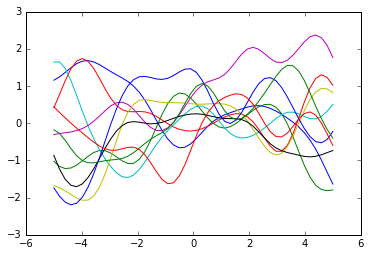

In [66]:
from __future__ import division

def kernel(a,b):
    """ GP squared exponential kernel """
    # t1: (n,1) t2: (1,n) t3: (n,n)
    # t1 + t2 => (n, n) with sum of pairs like a grid
    sqdist = a**2 + b.T**2 - 2. * a @ b.T
    return np.exp(-.5 * sqdist)
  
#number of test points
n=50
# test points
Xtest = np.linspace(-5, 5, n).reshape(-1, 1)
# kernel at test points
K_ = kernel(Xtest, Xtest)

# draw samples from the prior at our test points
# $K = L L^T$
L = np.linalg.cholesky(K_ + 1e-6*np.eye(n))
n_curves = 10
f_prior = np.dot(L, np.random.normal(size=(n,n_curves)))
print('xtest: ', Xtest.shape, ' f_p: ',f_prior.shape)

plt.plot(Xtest, f_prior)
plt.show()

GP Posterior
===========

$$
\arrthree{
\D &= \left\{
(\xb_i, f_i), i=1:N
\right\}
\\
p(f \mid \D)
&=
\frac{p(\D \mid f) ~p(f)}{p(\D)}
}
$$

the prior ensures that the fit/posterior is smooth.  
this is like saying, hey, function predictor, please make sure the functions you predict are smooth, not just based on the data.

the figure in the previous section are priors.  
the posterior will be like prior in the regions where there is no data and in the regions containing data, it will all be squished together.

Active Learning with GPs
==========================



Noiseless GP regression
=======================

* we observe a training set $\D = \left\{
(\xb_i, f_i), i=1:N
\right\}$ where $f_i = f(\xb_i)$
* Given a test set $\Xb_*$ of size $N_* \times D$, we want to predict the function outputs $\fb_*$

$$
\matp{\fb \\ \fb_*}
\sim
\mathcal{N}{\matp{\mub \\ \mub_*}, \matp{\Kb & \Kb_* \\ \Kb_*^T & \Kb_{**}}}
$$

where
$$
\arrthree{
\Kb &= \kappa(\Xb, \Xb) &: (N \times N)
\\
\Kb_* &= \kappa(\Xb, \Xb_*) &: (N \times N_*)
\\
\Kb_{* *} &= \kappa(\Xb_*, \Xb_*) &: (N_*, N_*)
\\
\kappa(x, \xp) &=
\sigma_f^2
\expb{-\fracone{2\ell^2} (x-\xp)^2}
}
$$

$$
\matp{\fb \\ \fb_*}
\sim
\mathcal{N}{\matp{\mub \\ \mub_*}, \matp{\Kb & \Kb_* \\ \Kb_*^T & \Kb_{**}}}
$$

$$
\arrthree{
p(\fb_* \mid \Xb_*, \Xb, \fb)
&=
\Nl{\fb_*}{\mub_*}{\Sigma_*}
\\
\mub_* &=
\mub(\Xb_*) + \Kb_*^T \inv{\Kb} (\fb - \mub(\Xb))
\\
\Sigma_* &=
\Kb_{* *} - \Kb_*^T \inv{\Kb} \Kb_*
}
$$

Effect of kernel width parameter
=================================

$$
\kappa(x, \xp)
=
\sigma_f^2
\expb{-\fracone{2\ell^2} (x-\xp)^2}
$$

Noisy GP regression
====================

